# Stationarity in Time Series Data

## Check for Stationary using Summary Statistics

We can split the data, then check the mean and variance of each group. If they differ and the difference is statistically significant, the time
series is likely non-stationary.

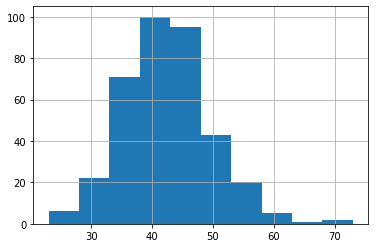

In [3]:
from pandas import read_csv
from matplotlib import pyplot as plt

series = read_csv("datasets/daily-total-female-births.csv", index_col = 0, parse_dates=True, squeeze=True)
series.hist()
plt.show()

We clearly see the
bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

In [10]:
# Split the dataset
split = int(len(series)/2)
X = series.values
X1, X2 = X[0:split], X[split:]

mean1, mean2 =X1.mean() , X2.mean()
var1, var2 = X1.var(), X2.var()
print(f'Mean X1: {mean1} ; Mean X2: {mean2}')
print(f'Var X1: {var1} ; Var X2: {var2}')

Mean X1: 39.76373626373626 ; Mean X2: 44.185792349726775
Var X1: 49.21341021615746 ; Var X2: 48.708650601690096


The mean and variance values are different, but in the
same ball-park.

## Augmented Dickey-Fuller test
- p-value > 0.05: Data is non-stationary
- p-value <= 0.05: Data is stationary

In [16]:
from statsmodels.tsa.stattools import adfuller

X = series.values
result = adfuller(X)

print("ADF statistic:", result[0])
print("p-value:", result[1])
print("Critical values:")
for key, value in result[4].items():
    print("{}: {}".format(key, value))

ADF statistics: -4.808291253559765
p-value: 5.2434129901498554e-05
Critical values:
1%: -3.448748905151901
5%: -2.8696473721448728
10%: -2.5710891239349585


- p-value is smaller than 0.05
- ADF statistic = -4, much smaller than the critical values
=> This dataset is stationary

Next, let test a non-stationary dataset

In [17]:
series = read_csv("datasets/airline-passengers.csv", index_col=0, parse_dates=True, squeeze=True)
X = series.values
result = adfuller(X)

print("ADF statistic:", result[0])
print("p-value:", result[1])
print("Critical values:")
for key, value in result[4].items():
    print("{}: {}".format(key, value))

ADF statistic: 0.8153688792060488
p-value: 0.991880243437641
Critical values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


The ADF statistic is much larger than the critical values, and the p-value is nearly 1
=> This dataset is far from stationary